**STEP 1: Import Packages**

Here, we are importing all required packages for program

In [1]:
import io
from google.colab import files

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**STEP 2: Input Dataset and Data Selection**

Here, we are importing our data from csv file, and also select the features to be used

In [ ]:
file = files.upload()

In [2]:
df = pd.read_csv("/content/sales_train.csv")
print("Total rows: ", df.shape[0])

Total rows:  2935849


In [3]:
# change date field into datetime format
df["date"] = pd.to_datetime(df["date"])

In [4]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [5]:
df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,2015-10-10,33,25,7409,299.0,1.0
2935845,2015-09-10,33,25,7460,299.0,1.0
2935846,2015-10-14,33,25,7459,349.0,1.0
2935847,2015-10-22,33,25,7440,299.0,1.0
2935848,2015-03-10,33,25,7460,299.0,1.0


In [6]:
# example how to find the most frequent values in df
print(df["item_id"].mode())

0    20949
dtype: int64


In [7]:
# Here, user will choose which shop and product they want to analyze. Here's an example for shop_id 22 and item_id 20949
df_product = df[(df.shop_id == 22) & (df.item_id == 20949)]
print("Total rows: ", df_product.shape[0])

Total rows:  848


In [8]:
# represent every data in date field as the first date of each month for plotting the monthly sales
df_monthly = df_product[["date", "shop_id", "item_id", "item_cnt_day"]].copy()
df_monthly["date"] = df_monthly["date"].dt.year.astype("str") + '-' + df["date"].dt.month.astype("str") + '-01'
df_monthly['date'] = pd.to_datetime(df_monthly['date'])
print("Total rows: ", df_monthly.shape[0])
df_monthly.head()

Total rows:  848


,date,shop_id,item_id,item_cnt_day
352379,2013-04-01,22,20949,12.0
352399,2013-04-01,22,20949,13.0
352400,2013-04-01,22,20949,4.0
352401,2013-04-01,22,20949,4.0
352455,2013-04-01,22,20949,2.0


In [9]:
# groupby date and sum the sales item
df_monthly_sum = df_monthly.copy()
df_monthly_sum = df_monthly_sum.groupby('date').item_cnt_day.sum().reset_index()
df_monthly_sum.rename(columns={'item_cnt_day':'item_sales'}, inplace=True)
print("Total rows: ", df_monthly_sum.shape[0])

# print all rows in dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df_monthly_sum)

Total rows:  36
         date  item_sales
0  2013-01-01        45.0
1  2013-02-01        54.0
2  2013-03-01        76.0
3  2013-04-01       124.0
4  2013-05-01       207.0
5  2013-06-01       190.0
6  2013-07-01       156.0
7  2013-08-01       193.0
8  2013-09-01       191.0
9  2013-10-01       171.0
10 2013-11-01       189.0
11 2013-12-01       221.0
12 2014-01-01       170.0
13 2014-02-01       167.0
14 2014-03-01       192.0
15 2014-04-01       162.0
16 2014-05-01       128.0
17 2014-06-01       132.0
18 2014-07-01       121.0
19 2014-08-01        90.0
20 2014-09-01       127.0
21 2014-10-01       122.0
22 2014-11-01       123.0
23 2014-12-01       182.0
24 2015-01-01        82.0
25 2015-02-01        93.0
26 2015-03-01       111.0
27 2015-04-01        76.0
28 2015-05-01        86.0
29 2015-06-01        86.0
30 2015-07-01        72.0
31 2015-08-01        74.0
32 2015-09-01        62.0
33 2015-10-01        55.0
34 2015-11-01        29.0
35 2015-12-01        23.0


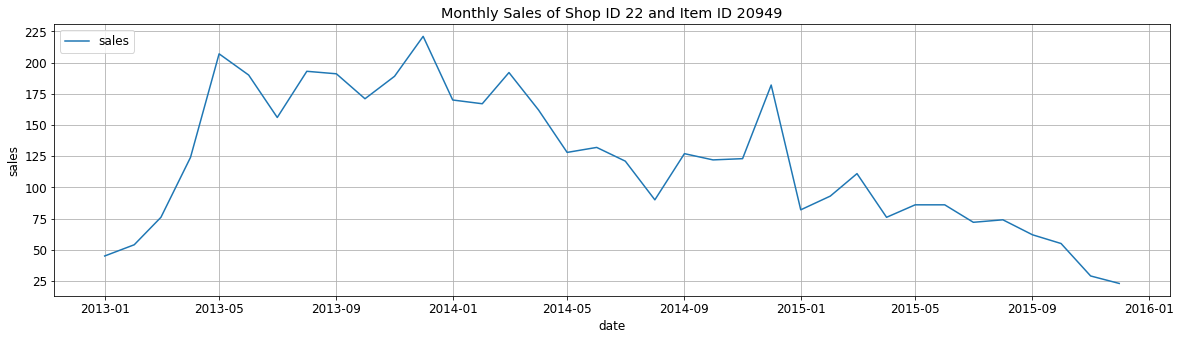

In [10]:
plt.rc("font", size=12)
fig, ax = plt.subplots(figsize=(20,5))

# specify how our line should look like
ax.plot(df_monthly_sum['date'], df_monthly_sum['item_sales'], label="sales")

# same as above
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Monthly Sales of Shop ID 22 and Item ID 20949")
ax.grid(True)
ax.legend(loc="upper left")

**STEP 3: Data Transformation**

As we can see, the data in the previous graph is not stationary yet and has a decreasing trend in the last few months. Here, we are using difference method to make the data stationary

Ps. Difference between stationary and not-stationary dataset


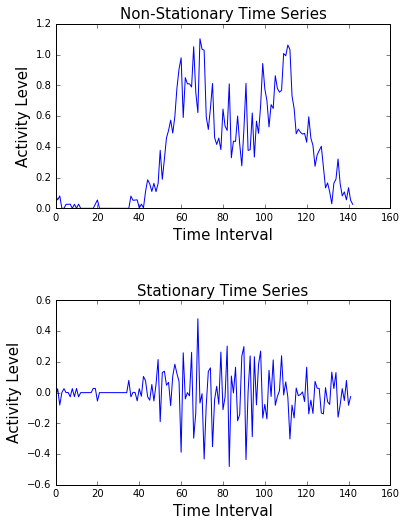

In [11]:
# create a new dataframe to model the difference
df_diff = df_monthly_sum.copy()

# implement the difference technique
df_diff["prev_sales"] = df_diff['item_sales'].shift(1)

# drop the null values and calculate the difference 
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['item_sales'] - df_diff['prev_sales'])

In [12]:
df_diff.head(100)

,date,item_sales,prev_sales,diff
1,2013-02-01,54.0,45.0,9.0
2,2013-03-01,76.0,54.0,22.0
3,2013-04-01,124.0,76.0,48.0
4,2013-05-01,207.0,124.0,83.0
5,2013-06-01,190.0,207.0,-17.0
6,2013-07-01,156.0,190.0,-34.0
7,2013-08-01,193.0,156.0,37.0
8,2013-09-01,191.0,193.0,-2.0
9,2013-10-01,171.0,191.0,-20.0
10,2013-11-01,189.0,171.0,18.0


Let’s plot it and check if it is stationary now:

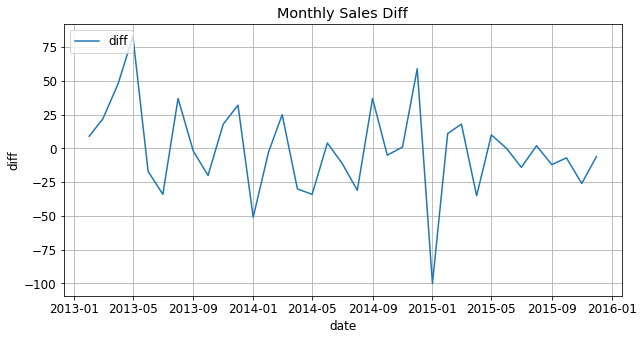

In [13]:
plt.rc("font", size=12)
fig, ax = plt.subplots(figsize=(10,5))

# specify how our line should look like
ax.plot(df_diff['date'], df_diff['diff'], label="diff")

# same as above
ax.set_xlabel("date")
ax.set_ylabel("diff")
ax.set_title("Monthly Sales Diff")
ax.grid(True)
ax.legend(loc="upper left")



As we can see, the graph looks stationary after differentiating. Next we need to use our previous monthly sales data to predict the next ones. I'll use 4 look-back period for this sample

In [19]:
#create dataframe for transformation from time series to supervised

df_supervised = df_diff.drop(['prev_sales'],axis=1)

#adding lags
for i in range(1,2):
    field_name = 'lag_' + str(i)
    df_supervised[field_name] = df_supervised['diff'].shift(i)

#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)

In [20]:
df_supervised.head(36)

,date,item_sales,diff,lag_1
0,2013-03-01,76.0,22.0,9.0
1,2013-04-01,124.0,48.0,22.0
2,2013-05-01,207.0,83.0,48.0
3,2013-06-01,190.0,-17.0,83.0
4,2013-07-01,156.0,-34.0,-17.0
5,2013-08-01,193.0,37.0,-34.0
6,2013-09-01,191.0,-2.0,37.0
7,2013-10-01,171.0,-20.0,-2.0
8,2013-11-01,189.0,18.0,-20.0
9,2013-12-01,221.0,32.0,18.0


We should make sure that our flags is good as features. To do this, we will use Adjusted R-squared

In [21]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf

# Define the regression formula
model = smf.ols(formula='diff ~ lag_1', data=df_supervised)

# Fit the regression
model_fit = model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

-0.0016957235226708889


In [22]:
 #import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler

df_model = df_supervised.drop(['item_sales','date'],axis=1)

In [23]:
df_model.head(37)

,diff,lag_1
0,22.0,9.0
1,48.0,22.0
2,83.0,48.0
3,-17.0,83.0
4,-34.0,-17.0
5,37.0,-34.0
6,-2.0,37.0
7,-20.0,-2.0
8,18.0,-20.0
9,32.0,18.0


In [24]:
#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-6:].values

In [25]:
print(train_set)

[[  22.    9.]
 [  48.   22.]
 [  83.   48.]
 [ -17.   83.]
 [ -34.  -17.]
 [  37.  -34.]
 [  -2.   37.]
 [ -20.   -2.]
 [  18.  -20.]
 [  32.   18.]
 [ -51.   32.]
 [  -3.  -51.]
 [  25.   -3.]
 [ -30.   25.]
 [ -34.  -30.]
 [   4.  -34.]
 [ -11.    4.]
 [ -31.  -11.]
 [  37.  -31.]
 [  -5.   37.]
 [   1.   -5.]
 [  59.    1.]
 [-100.   59.]
 [  11. -100.]
 [  18.   11.]
 [ -35.   18.]
 [  10.  -35.]
 [   0.   10.]]


In [26]:
print(test_set)

[[-14.   0.]
 [  2. -14.]
 [-12.   2.]
 [ -7. -12.]
 [-26.  -7.]
 [ -6. -26.]]


In [27]:
# apply MinMax Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)

train_set.shape

(28, 2)

In [28]:
# transform train_set
train_set_scaled = scaler.transform(train_set)
print(train_set_scaled)

[[ 0.33333333  0.19125683]
 [ 0.61748634  0.33333333]
 [ 1.          0.61748634]
 [-0.09289617  1.        ]
 [-0.27868852 -0.09289617]
 [ 0.49726776 -0.27868852]
 [ 0.07103825  0.49726776]
 [-0.12568306  0.07103825]
 [ 0.28961749 -0.12568306]
 [ 0.44262295  0.28961749]
 [-0.46448087  0.44262295]
 [ 0.06010929 -0.46448087]
 [ 0.36612022  0.06010929]
 [-0.23497268  0.36612022]
 [-0.27868852 -0.23497268]
 [ 0.13661202 -0.27868852]
 [-0.0273224   0.13661202]
 [-0.24590164 -0.0273224 ]
 [ 0.49726776 -0.24590164]
 [ 0.03825137  0.49726776]
 [ 0.10382514  0.03825137]
 [ 0.73770492  0.10382514]
 [-1.          0.73770492]
 [ 0.21311475 -1.        ]
 [ 0.28961749  0.21311475]
 [-0.28961749  0.28961749]
 [ 0.20218579 -0.28961749]
 [ 0.09289617  0.20218579]]


In [29]:
# transform test set
test_set_scaled = scaler.transform(test_set)
print(test_set_scaled)

[[-0.06010929  0.09289617]
 [ 0.1147541  -0.06010929]
 [-0.03825137  0.1147541 ]
 [ 0.01639344 -0.03825137]
 [-0.19125683  0.01639344]
 [ 0.0273224  -0.19125683]]


**LSTM MODEL**

In [30]:
x_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])

x_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

print(x_train.shape)
print(x_train)

(28, 1, 1)
[[[ 0.19125683]]

 [[ 0.33333333]]

 [[ 0.61748634]]

 [[ 1.        ]]

 [[-0.09289617]]

 [[-0.27868852]]

 [[ 0.49726776]]

 [[ 0.07103825]]

 [[-0.12568306]]

 [[ 0.28961749]]

 [[ 0.44262295]]

 [[-0.46448087]]

 [[ 0.06010929]]

 [[ 0.36612022]]

 [[-0.23497268]]

 [[-0.27868852]]

 [[ 0.13661202]]

 [[-0.0273224 ]]

 [[-0.24590164]]

 [[ 0.49726776]]

 [[ 0.03825137]]

 [[ 0.10382514]]

 [[ 0.73770492]]

 [[-1.        ]]

 [[ 0.21311475]]

 [[ 0.28961749]]

 [[-0.28961749]]

 [[ 0.20218579]]]


In [31]:
x_train.shape

(28, 1, 1)

In [32]:
import tensorflow as tf

model = tf.keras.models.Sequential([
            tf.keras.layers.LSTM(128, activation="relu", return_sequences=True, batch_input_shape=(1, x_train.shape[1], x_train.shape[2])),
            tf.keras.layers.LSTM(64, activation="relu"),
            tf.keras.layers.Dense(1)
        ])

model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
28/28 [==============================] - 2s 3ms/step - loss: 0.2706
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1230
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.1588
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1691
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.1179
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1569
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.1513
Epoch 8/100
28/28 [==============================] - 0s 3ms/step - loss: 0.1232
Epoch 9/100
28/28 [==============================] - 0s 3ms/step - loss: 0.1369
Epoch 10/100
28/28 [==============================] - 0s 3ms/step - loss: 0.2050
Epoch 11/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1668
Epoch 12/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1407
Epoch 13/100
28/28 [=================

In [33]:
y_pred = model.predict(x_test, batch_size=1)

# for multistep prediction, you need to replace x_test values with the predictions coming from t-1

In [34]:
y_pred

array([[0.14648211],
       [0.15251505],
       [0.1456319 ],
       [0.15147583],
       [0.14938127],
       [0.16103204]], dtype=float32)

In [35]:
y_test

array([[-0.06010929],
       [ 0.1147541 ],
       [-0.03825137],
       [ 0.01639344],
       [-0.19125683],
       [ 0.0273224 ]])

In [36]:
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])

#rebuild test set for inverse transform
pred_test_set = []

for index in range(0,len(y_pred)):
    print(np.concatenate([y_pred[index],x_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))

#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])

#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[[0.14648211 0.09289617]]
[[ 0.15251505 -0.06010929]]
[[0.14563189 0.1147541 ]]
[[ 0.15147583 -0.03825137]]
[[0.14938127 0.01639344]]
[[ 0.16103204 -0.19125683]]


In [37]:
#create dataframe that shows the predicted sales
result_list = []
sales_dates = list(df_monthly_sum[-7:].date)
act_sales = list(df_monthly_sum[-7:].item_sales)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales

In [38]:
df_result.head(6)

,pred_value,date
0,90,2015-07-01
1,77,2015-08-01
2,78,2015-09-01
3,67,2015-10-01
4,60,2015-11-01
5,35,2015-12-01


In [39]:
df_diff.tail(6)

,date,item_sales,prev_sales,diff
30,2015-07-01,72.0,86.0,-14.0
31,2015-08-01,74.0,72.0,2.0
32,2015-09-01,62.0,74.0,-12.0
33,2015-10-01,55.0,62.0,-7.0
34,2015-11-01,29.0,55.0,-26.0
35,2015-12-01,23.0,29.0,-6.0


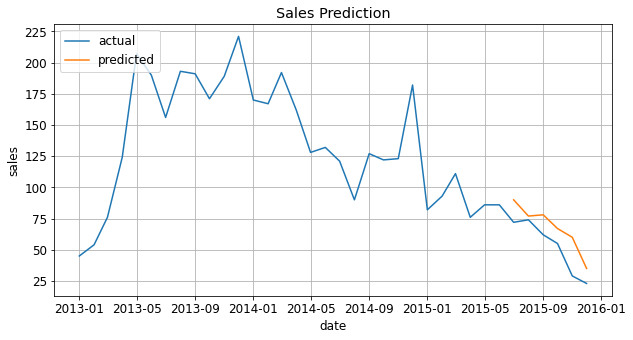

In [41]:
df_sales_pred = pd.merge(df_monthly_sum, df_result, on="date", how="left")

plt.rc("font", size=12)
fig, ax = plt.subplots(figsize=(10,5))

# specify how our line should look like
ax.plot(df_sales_pred['date'], df_sales_pred['item_sales'], label="actual")
ax.plot(df_sales_pred['date'], df_sales_pred['pred_value'], label="predicted")

# same as above
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Sales Prediction")
ax.grid(True)
ax.legend(loc="upper left")

